In [1]:
import tensorflow as tf
from tensorflow.keras import layers

In [9]:
# Load and preprocess the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '../data/tibia_fibula_fracture/',
    label_mode='binary',
    seed=123,
    validation_split=0.2,
    subset="both",
    image_size=(300, 300),
    batch_size=16,
    color_mode='grayscale'
)

Found 2127 files belonging to 2 classes.
Using 1702 files for training.
Using 425 files for validation.


In [10]:
model2 = tf.keras.Sequential([
    #data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(300, 300, 1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

In [13]:
# Compile and train the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

model2.fit(dataset[0], epochs=20, validation_data=dataset[1], callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)], class_weight={0: 1, 1: 10})

Epoch 1/20
107/107 [==============================] - 13s 108ms/step - loss: 1.0451 - accuracy: 0.8608 - auc: 0.9083 - precision: 0.2648 - recall: 0.7451 - val_loss: 0.3203 - val_accuracy: 0.8400 - val_auc: 0.8629 - val_precision: 0.2471 - val_recall: 0.8400
Epoch 2/20
107/107 [==============================] - 12s 106ms/step - loss: 0.6386 - accuracy: 0.8196 - auc: 0.9267 - precision: 0.2310 - recall: 0.8627 - val_loss: 0.3000 - val_accuracy: 0.7859 - val_auc: 0.8983 - val_precision: 0.1944 - val_recall: 0.8400
Epoch 3/20
107/107 [==============================] - 12s 108ms/step - loss: 0.6138 - accuracy: 0.8443 - auc: 0.9404 - precision: 0.2730 - recall: 0.9608 - val_loss: 0.2196 - val_accuracy: 0.8306 - val_auc: 0.9564 - val_precision: 0.2577 - val_recall: 1.0000
Epoch 4/20
107/107 [==============================] - 12s 109ms/step - loss: 1.7108 - accuracy: 0.8361 - auc: 0.9403 - precision: 0.2602 - recall: 0.9412 - val_loss: 0.2626 - val_accuracy: 0.8165 - val_auc: 0.9409 - val_pre

27/27 [==============================] - 1s 34ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91       400
         1.0       0.27      0.92      0.42        25

    accuracy                           0.85       425
   macro avg       0.63      0.88      0.67       425
weighted avg       0.95      0.85      0.88       425

Confusion Matrix:


<Axes: >

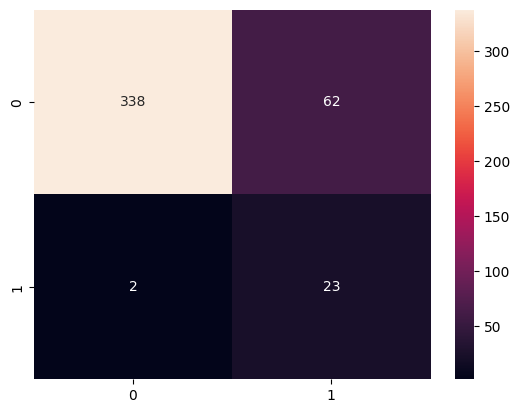

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Get the predictions on the validation data
y_pred = model2.predict(dataset[1])

# Convert the predictions to binary values
y_pred_binary = (y_pred > 0.5).astype(int)

# Get the true labels from the validation data
y_true = np.concatenate([y for x, y in dataset[1]], axis=0)

# Generate the classification report
report = classification_report(y_true, y_pred_binary)
print(report)

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_true,y_pred_binary),annot = True,fmt='d')